In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
import warnings
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv("/Users/rohanshenoy/Downloads/house_price_regression_dataset.csv")
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


# implementation using scikit learn


In [3]:
X = df[['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built', 'Lot_Size', 'Garage_Size', 'Neighborhood_Quality']]
y = df['House_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_features = MinMaxScaler()
X_train_scaled = scaler_features.fit_transform(X_train)
X_test_scaled = scaler_features.transform(X_test)
scaler_target = MinMaxScaler()
y_train_scaled = scaler_target.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_target.transform(y_test.values.reshape(-1, 1)).ravel()
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = linear_model.predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
r2 = r2_score(y_test_scaled, y_pred_scaled)
print(f"MSE: {mse:.10f}")
print(f"R-Squared Score: {r2: .10f}")

MSE: 0.0001021260
R-Squared Score:  0.9984263637


# implementation from scratch

In [4]:
X = df[['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built', 'Lot_Size', 'Garage_Size']].values
y = df['House_Price'].values

split_data = int(len(X) * 0.8)
X_train, X_test = X[:split_data], X[split_data:]
y_train, y_test = y[:split_data], y[split_data:]

X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

learning_rate = 0.00000001
epochs = 1000

theta = np.random.randn(X_train_b.shape[1])

for epoch in range(epochs):
    gradients = 2 / X_train_b.shape[0] * X_train_b.T @ (X_train_b @ theta - y_train)
    theta -= learning_rate * gradients

y_pred = X_test_b @ theta
mse = np.mean((y_test - y_pred) ** 2)
r2 = 1 - np.sum((y_test - y_pred) ** 2) / np.sum((y_test - y_test.mean()) ** 2)

print("MSE:",mse)
print("R2:",r2)

MSE: 996870851.5321308
R2: 0.9836755509942864


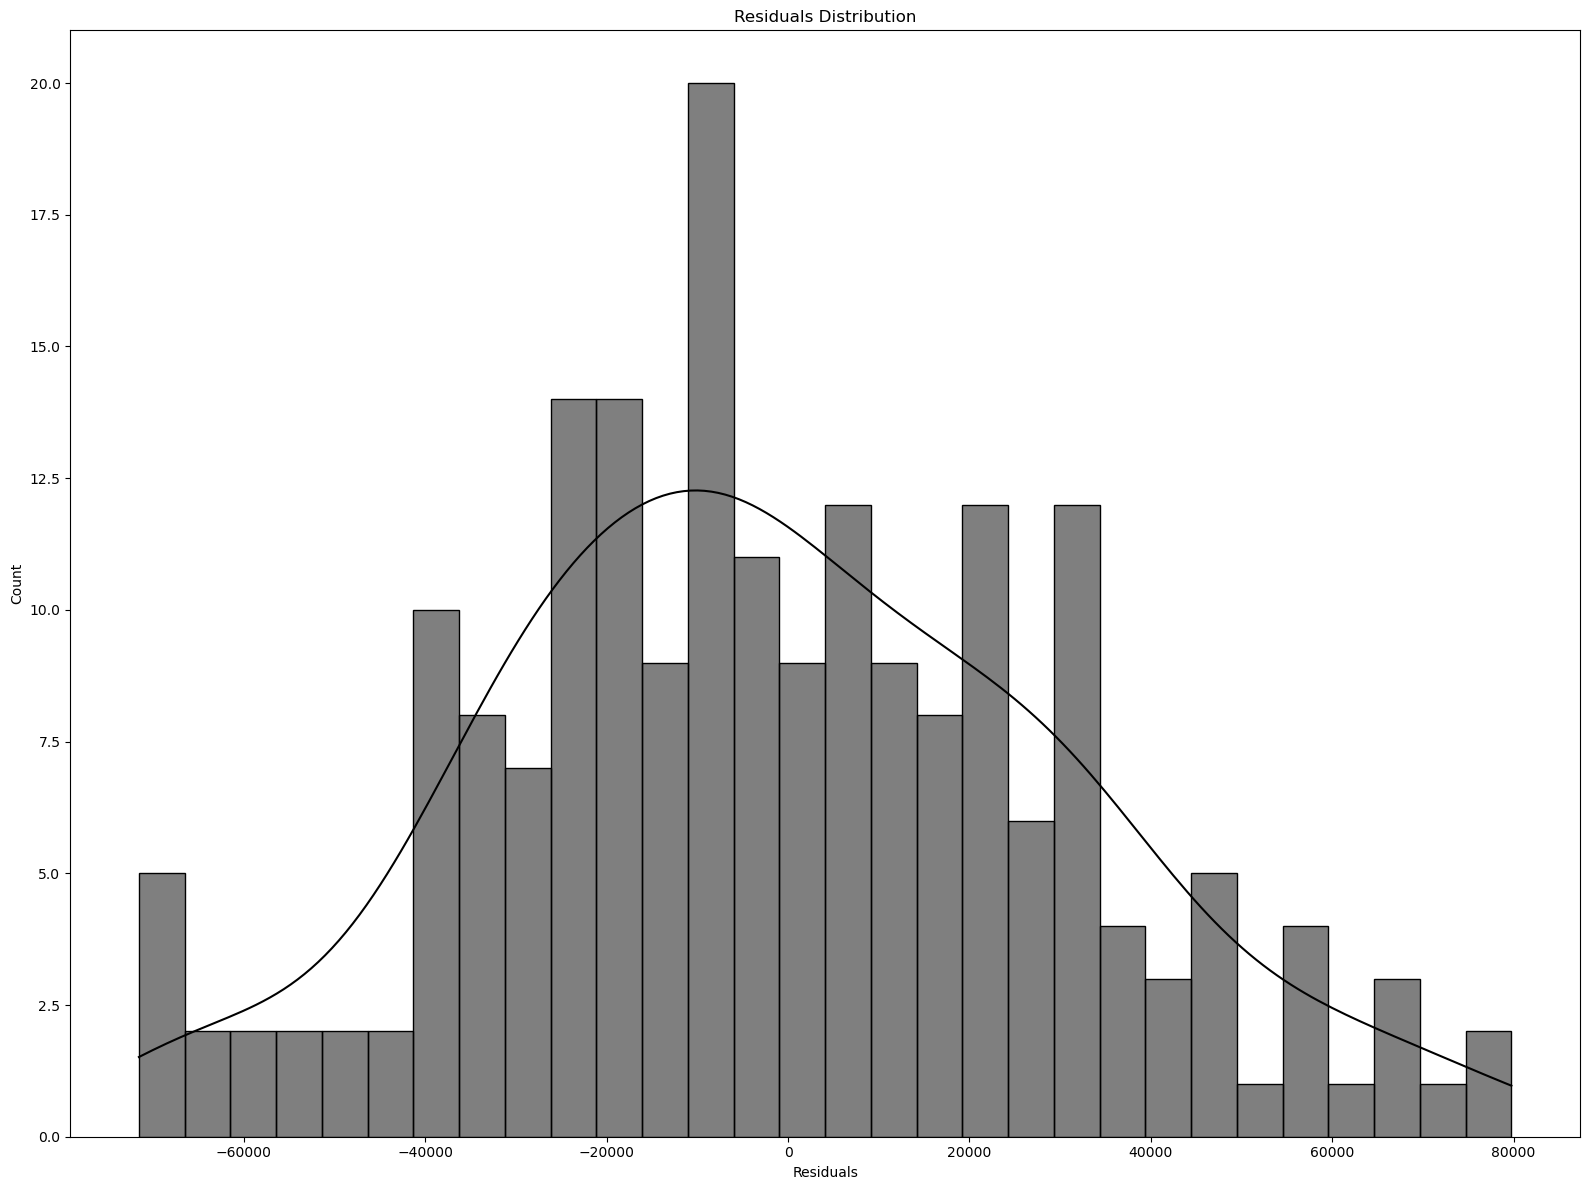

In [5]:
plt.figure(figsize=(16, 12))
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='black', bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Predicted Prices')

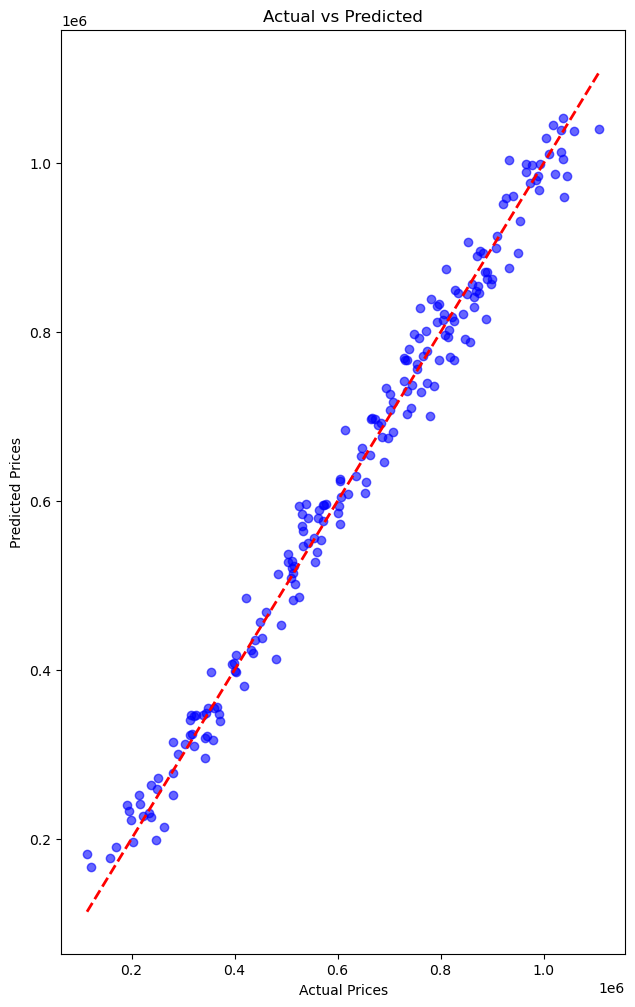

In [6]:
plt.figure(figsize=(16, 12))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs Predicted")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")